In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from peakdetect import peakdet
from numpy.fft import rfft,irfft
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
realdata=np.fromfile("200ms/200ms_500MHz.bin",'u2')

In [3]:
N=len(realdata)
dt=1/2.7e9
totmean=realdata.mean()
A=sqrt(realdata.var()*2)
NuX=500.69254048e6 ## from the other document
phi_offset=2 ## from the other document
fakedata=totmean+A*sin(arange(N)*dt*2*np.pi*NuX+phi_offset)

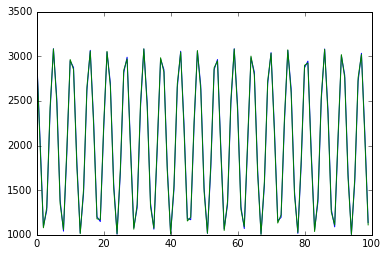

In [4]:
plot(arange(100),realdata[:100])
plot(arange(100),fakedata[:100])

In [5]:
Nchunks=200
ChunkSize=int(N/Nchunks)

In [6]:
subdata=[]
#mean/rms for real
meanzt=np.zeros((Nchunks,))
At=np.zeros((Nchunks,))
#mean/rms for fake
meanzf=np.zeros((Nchunks,))
Af=np.zeros((Nchunks,))

for i in range(Nchunks):
    subdata=realdata[i*ChunkSize:(i+1)*ChunkSize]
    meanzt[i]=subdata.mean()
    At[i]=np.sqrt(subdata.var()*2)
    subdata=fakedata[i*ChunkSize:(i+1)*ChunkSize]
    meanzf[i]=subdata.mean()
    Af[i]=np.sqrt(subdata.var()*2)
    

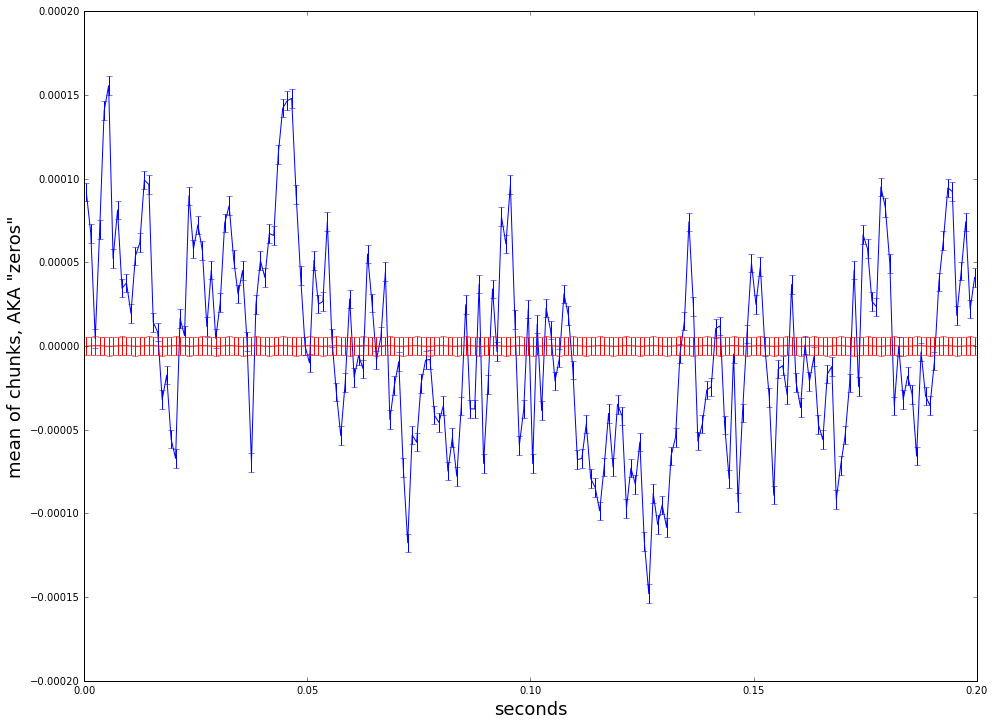

In [7]:
figure (figsize=(16,12))
t=(np.arange(Nchunks)+0.5)*dt*ChunkSize
## because fake data has no actual scatter, we can use their scatter as
## the error
y1=(meanzt-totmean)/totmean
y2=(meanzf-totmean)/totmean
err=sqrt(meanzf.var()/totmean)
errorbar(t,y1,fmt='b-',yerr=err)
errorbar(t,y2,fmt='r-',yerr=err)
plt.xlabel('seconds', fontsize=18)
plt.ylabel('mean of chunks, AKA "zeros"', fontsize=18)

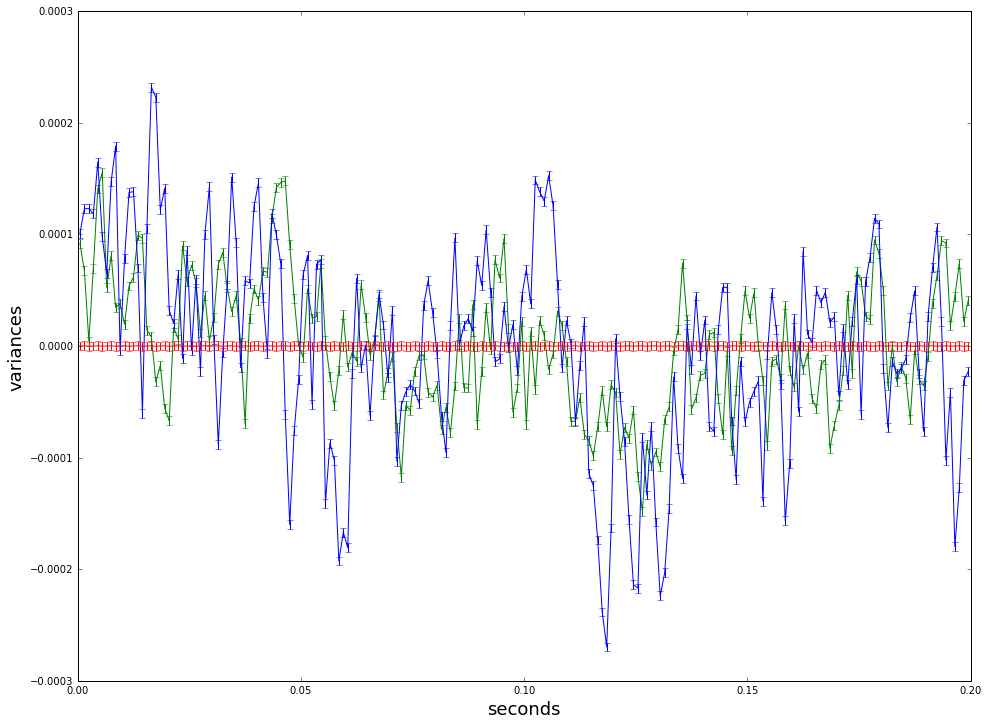

In [8]:
figure (figsize=(16,12))
t=(np.arange(Nchunks)+0.5)*dt*ChunkSize
## because fake data has no actual scatter, we can use their scatter as
## the error
y1=(At)/A-1
y1m=(meanzt-totmean)/totmean
y2=(Af)/A-1
err=sqrt(Af.var()/A)
errorbar(t,y1m,fmt='g-',yerr=err)
errorbar(t,y1,fmt='b-',yerr=err)
errorbar(t,y2,fmt='r-',yerr=err)
plt.xlabel('seconds', fontsize=18)
plt.ylabel('variances', fontsize=18)

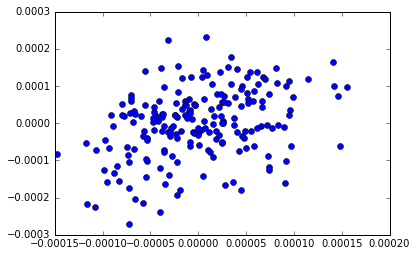

In [9]:
plot(y1m,y1,'bo')